## Hőterjedés szimulációja

Jelölje $U(x,y,t)$ a hőmérsékletet a sík egy pontjában, adott $t$ időpillanatban. Ennek viselkedését az ún. hőegyenlet írja le:
\begin{align}
\frac{\partial U}{\partial t} &= \alpha \left(\frac{\partial^2 U }{\partial x^2} + \frac{\partial^2 U }{\partial y^2}\right).
\end{align}
Diszkretizáljuk a fentit a tanult módon, a második deriváltra a centrális sémát alkalmazva:
\begin{align}
\frac{\partial U}{\partial t} &\approx \frac{U(x,y,t+\Delta t) - U(x,y,t)}{\Delta t}, \\
\frac{\partial^2 U}{\partial x^2} &\approx \frac{\frac{U(x+\Delta x,y,t) - U(x,y,t)}{\Delta x} - \frac{U(x,y,t) - U(x-\Delta x,y,t)}{\Delta x}}{\Delta x} \\
&= \frac{U(x+\Delta x,y,t) - 2U(x,y,t) + U(x-\Delta x,y,t)}{\left(\Delta x\right)^2} .
\end{align}
Ezt behelyettesítve
\begin{align}
\frac{U(x,y,t+\Delta t) - U(x,y,t)}{\Delta t} = \alpha \left(\frac{U(x+\Delta x,y,t) - 2U(x,y,t) + U(x-\Delta x,y,t)}{\left(\Delta x\right)^2} + \frac{U(x,y+\Delta y,t) - 2U(x,y,t) + U(x,y-\Delta y,t)}{\left(\Delta y\right)^2}\right)
\end{align}
adódik. Legyen $h$ a rács mérete, azaz
\begin{align}
h &:= \Delta x = \Delta y .
\end{align}
Így egyszerűsíthetünk
\begin{align}
\frac{U(x,y,t+\Delta t) - U(x,y,t)}{\Delta t} = \alpha \left(\frac{U(x+h,y,t) + U(x-h,y,t) + U(x,y+h,t) + U(x,y-h,t) - 4U(x,y,t)}{h^2} \right),
\end{align}
majd bevezetve a 
\begin{align}
\Delta t := \frac{h^2}{4\alpha}
\end{align}
állandót, a következő egyszerű formulát kapjuk a hőterjedésre:
\begin{align}
U(x,y,t+\Delta t) = \frac{1}{4} \Big(U(x+h,y,t) + U(x-h,y,t) + U(x,y+h,t) + U(x,y-h,t) \Big).
\end{align}
A rácsot mátrixszal megvalósítva az alábbi update szabályt kapjuk a szimulációhoz:
\begin{align}
U_{ij} \gets \frac{1}{4} \Big(U_{i+1,j} + U_{i-1,j} + U_{i,j+1} + U_{i,j-1} \Big) .
\end{align}
A szimulációt végezzük a tóruszon, azaz a tartomány bal oldalát azonosítsuk a jobb oldalával, az alsót pedig a felsővel.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


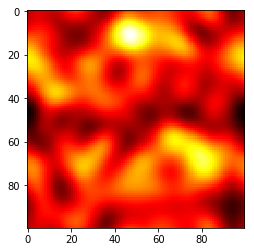

In [2]:
U  = np.random.randn(100,100)
dt = 0.05
for i in range(300):
    U += dt*(np.roll(U,1,axis=0) + np.roll(U,-1,axis=0) + np.roll(U,1,axis=1) + np.roll(U,-1,axis=1)-4*U)

imshow(U,cmap='hot');

In [3]:
R,r = 100,50
θ,ϕ = np.meshgrid(np.arange(100),np.arange(100))
θ   = (θ.flatten()-50)/49.5*np.pi
ϕ   = (ϕ.flatten()-50)/49.5*np.pi

r   = r+U.flatten()*5
pos = np.vstack([(R+r*np.cos(θ))*np.cos(ϕ),
                 (R+r*np.cos(θ))*np.sin(ϕ),
                  r*np.sin(θ)])

rθ,rϕ = -30/180*np.pi,-30/180*np.pi
rot1 = np.array([[np.cos(rθ),-np.sin(rθ),0],
                 [np.sin(rθ), np.cos(rθ),0],
                 [0              ,0             ,1]])
rot2 = np.array([[np.cos(rϕ),0,-np.sin(rϕ)],
                 [0         ,1,0          ],
                 [np.sin(rϕ),0,np.cos(rϕ)]])
R   = rot2@rot1
pos = R@pos
pos = pos.reshape(3,100,100)

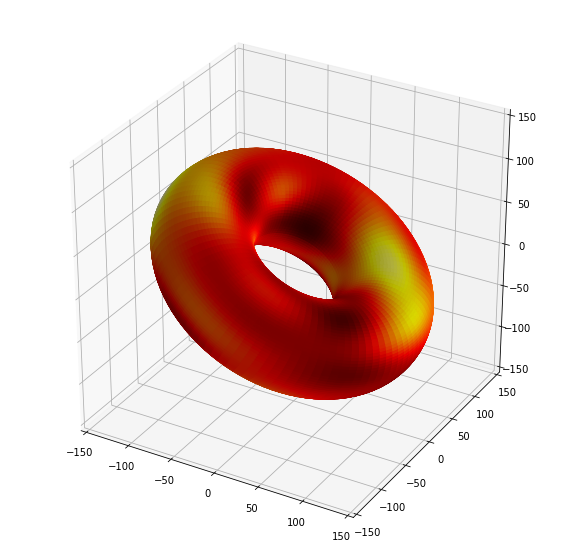

In [4]:
from mpl_toolkits.mplot3d import Axes3D
f  = figure()
f.set_size_inches(10,10)
ax = f.add_subplot(111, projection='3d')
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150,150)
ax.plot_surface(pos[0],pos[1],pos[2],rcount=100,ccount=100,facecolors=cm.hot((U-np.min(U))/(np.max(U)-np.min(U))));